In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
bost = load_boston()

In [4]:
bost.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
data = bost['data']

In [6]:
target = bost['target']

In [7]:
df = pd.DataFrame(data)

In [8]:
df.columns=bost['feature_names']

In [24]:

df['price']=bost['target']

In [25]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# EDA

In [28]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


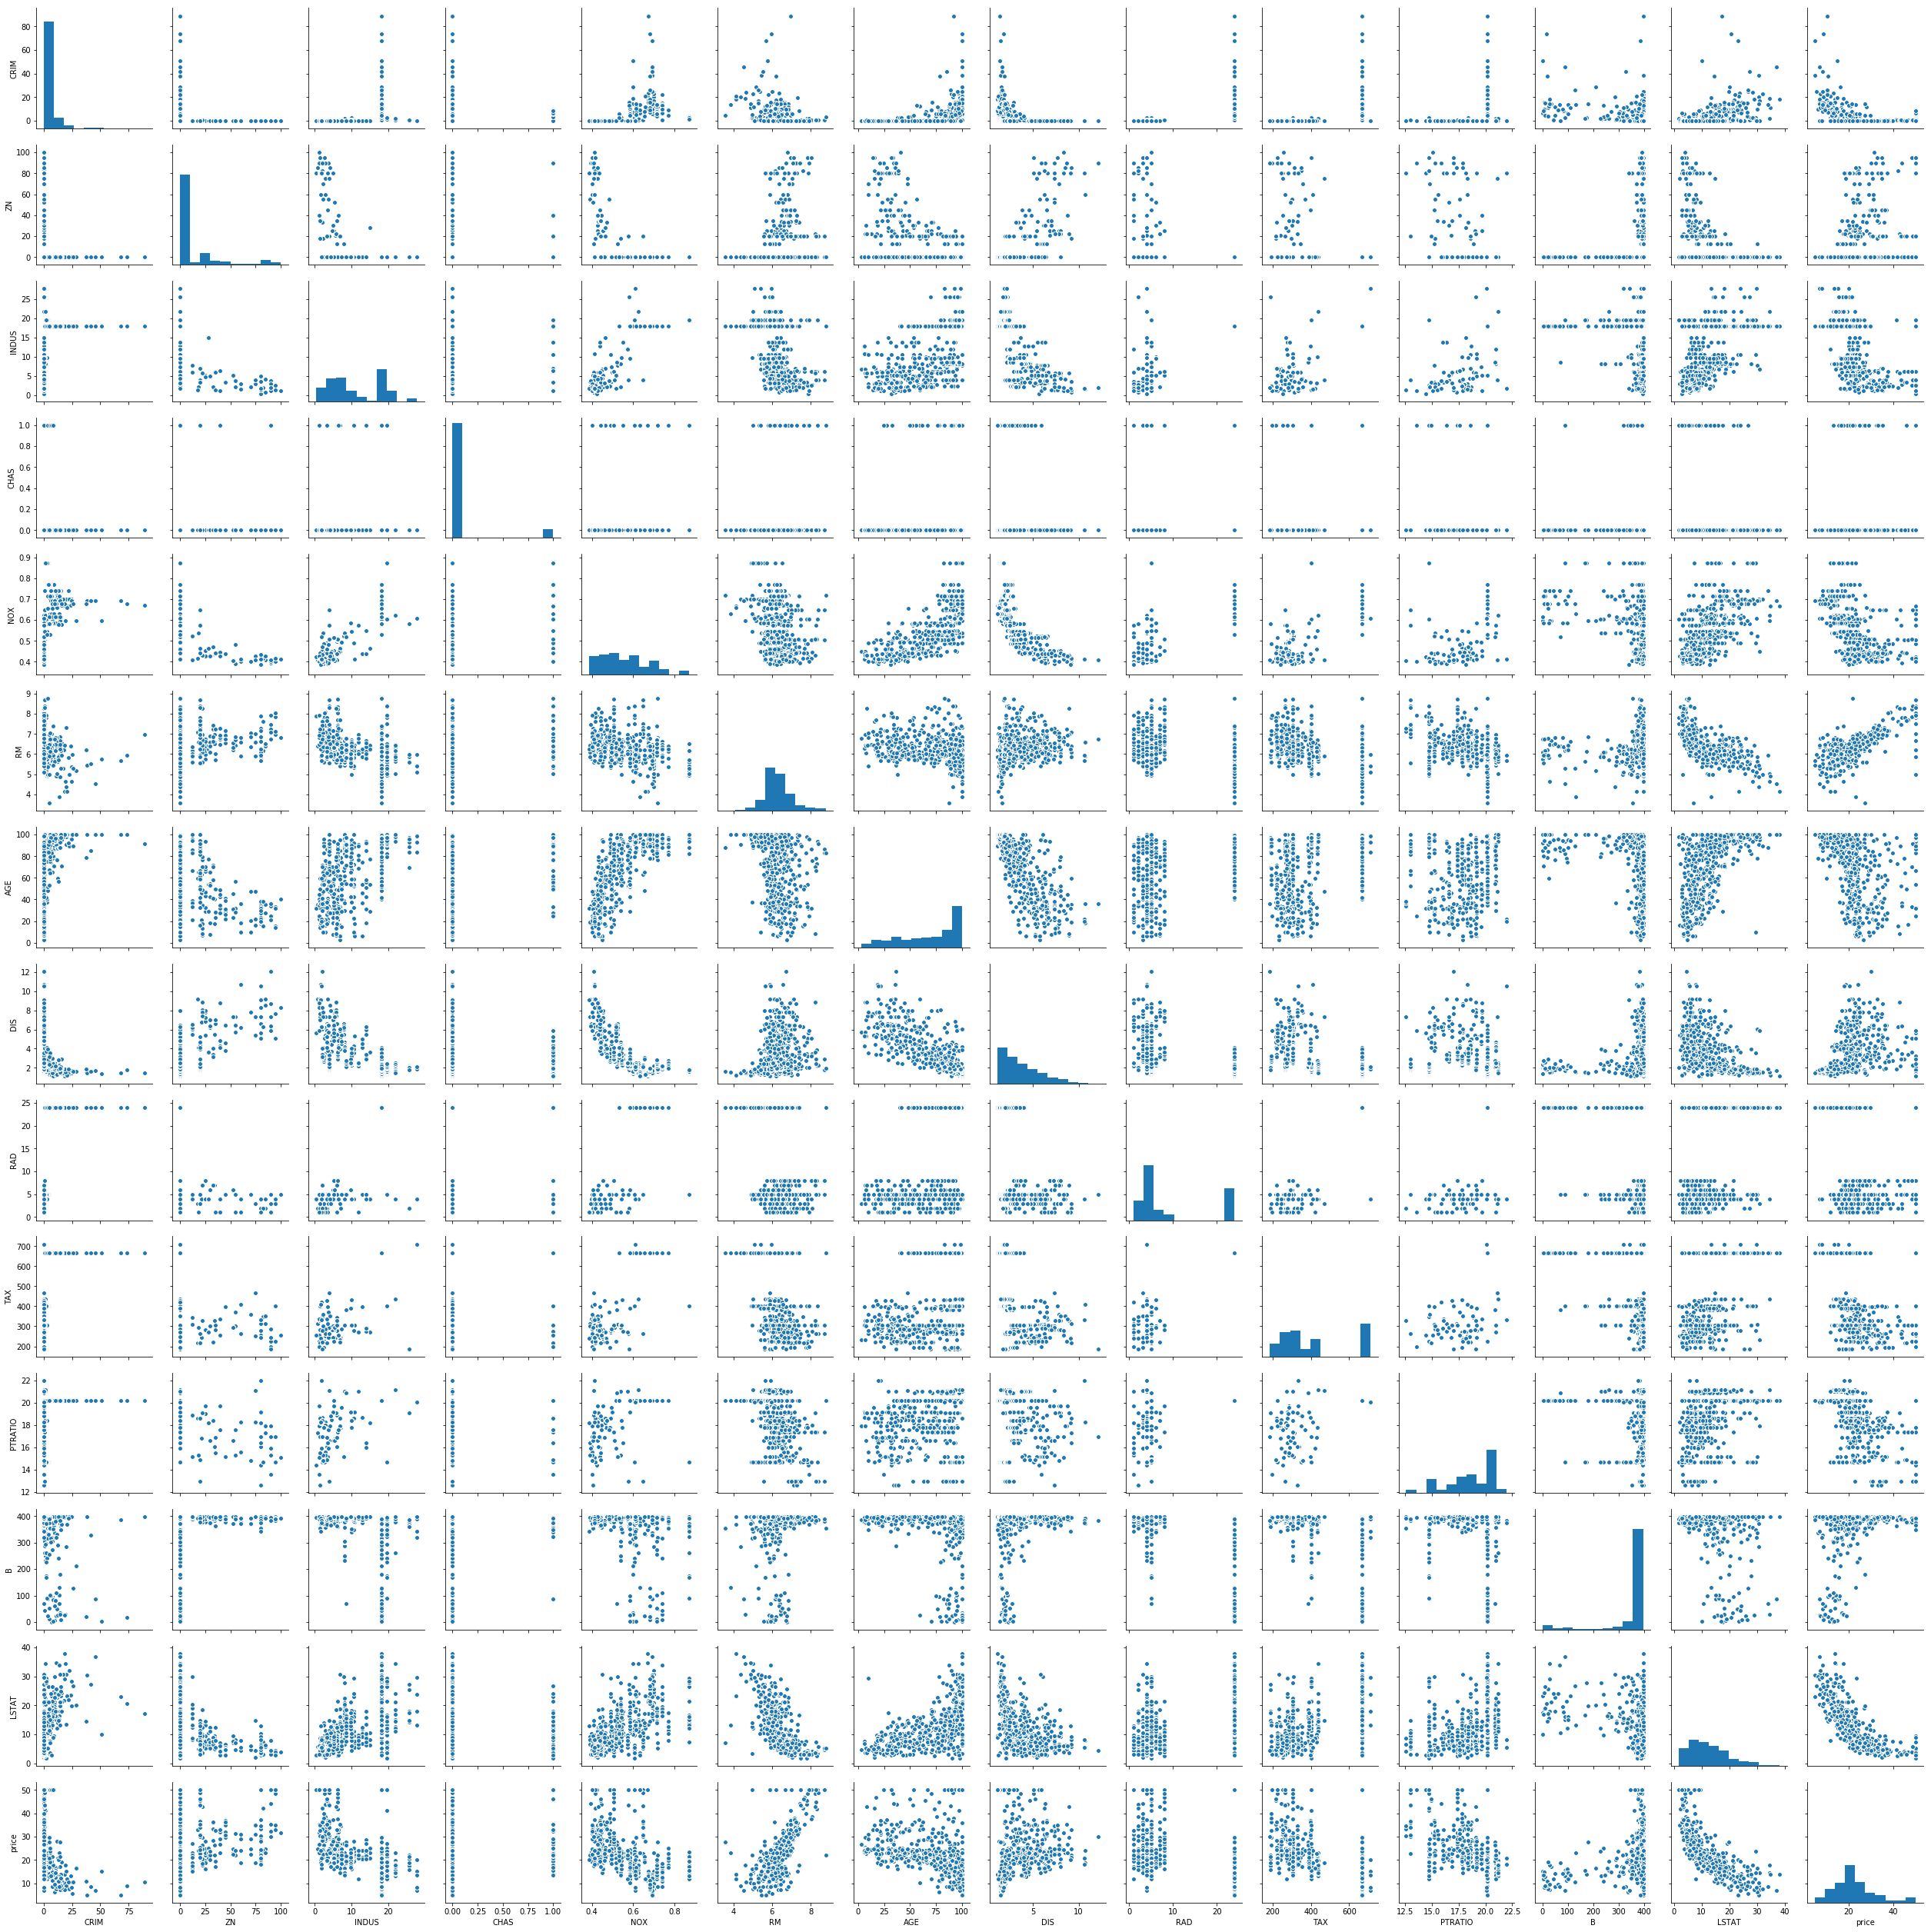

In [29]:
sns.pairplot(df)

In [32]:
col_study = ['ZN','INDUS','NOX','RM']

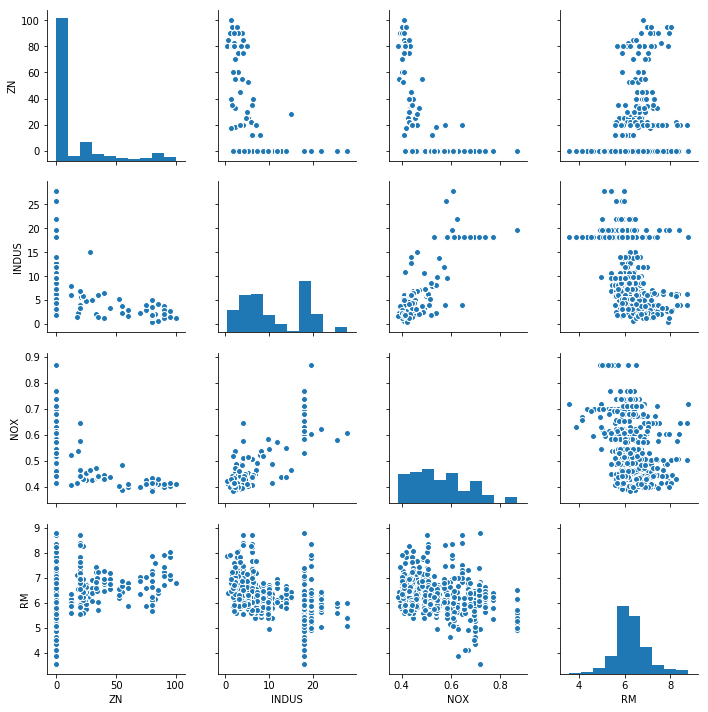

In [33]:
sns.pairplot(df[col_study])

In [36]:
col_study_1 =['PTRATIO', 'B', 'LSTAT', 'price']

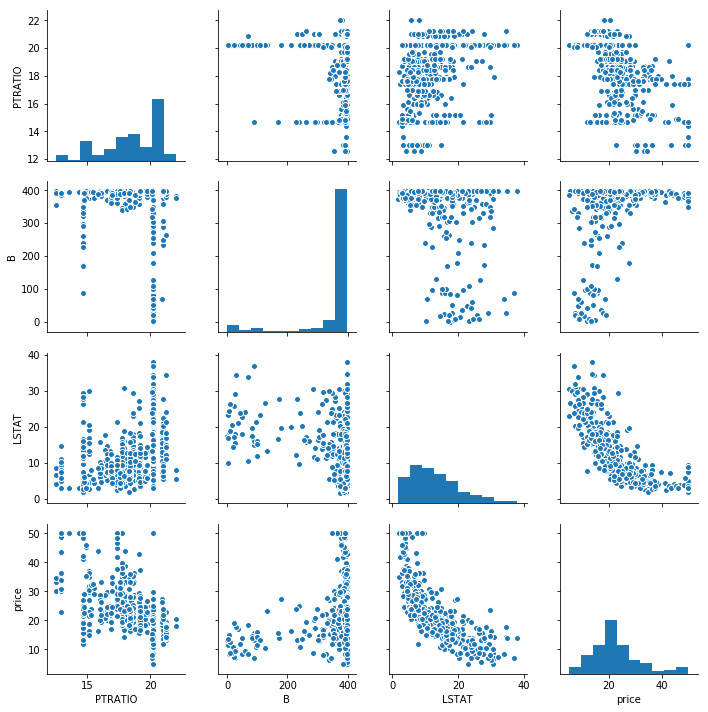

In [38]:
sns.pairplot(df[col_study_1])

## CORRELATION AND FEATURE SELECTION

In [48]:
pd.options.display.float_format = '{:,.2f}'.format
df.corr()
# for univariate linear regression the high correlation value column with target variable will be selecting for model creation
# column RM and LSTAT are both highly correlated and inverse high correlated with target variable

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.00,-0.20,0.40,-0.06,0.42,-0.22,0.35,-0.38,0.62,0.58,0.29,-0.38,0.45,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.40,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.62,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


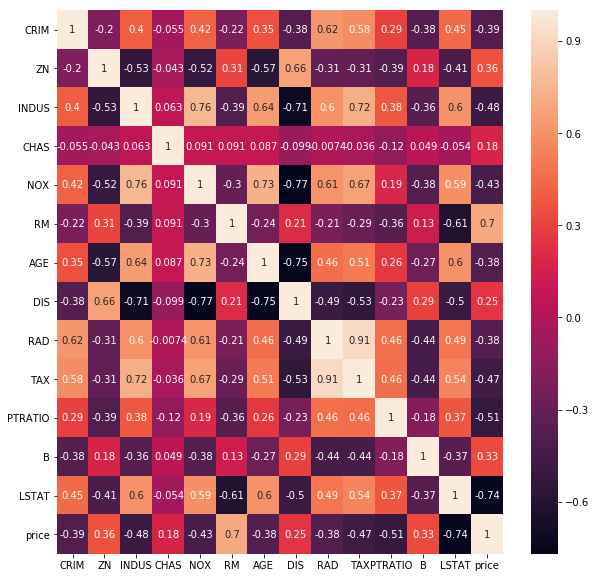

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

## UNIVARIATE LINEAR REGRESSION MODEL

### MODEL WITH HIGH POSITIVE CORRELATION

In [55]:
X = df['RM'].values.reshape(-1,1)
# convert values into matrix form for scikitlearn to understand

In [61]:
y = df['price'].values

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lm = LinearRegression()

In [65]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
lm.coef_

array([9.10210898])

In [67]:
lm.intercept_

-34.67062077643857

Text(0,0.5,'price')

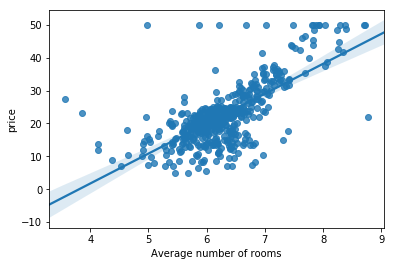

In [70]:
sns.regplot(X,y)
plt.xlabel('Average number of rooms')
plt.ylabel('price')


C:\Users\winuser\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\winuser\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


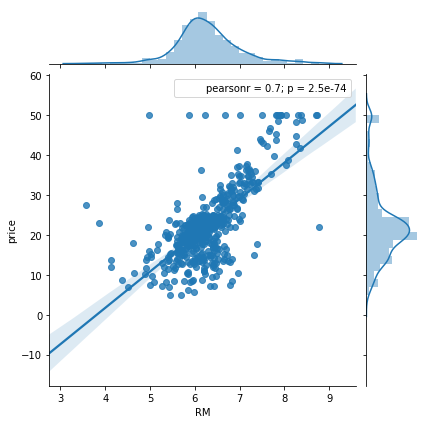

In [73]:
sns.jointplot(df['RM'],df['price'],kind='reg')


### MODEL WITH COLUMN INVERSELY CORRELATED

In [81]:
X1=df['LSTAT'].values.reshape(-1,1)

In [82]:
y1 = df['price'].values

In [83]:
lm.fit(X1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0,0.5,'Price')

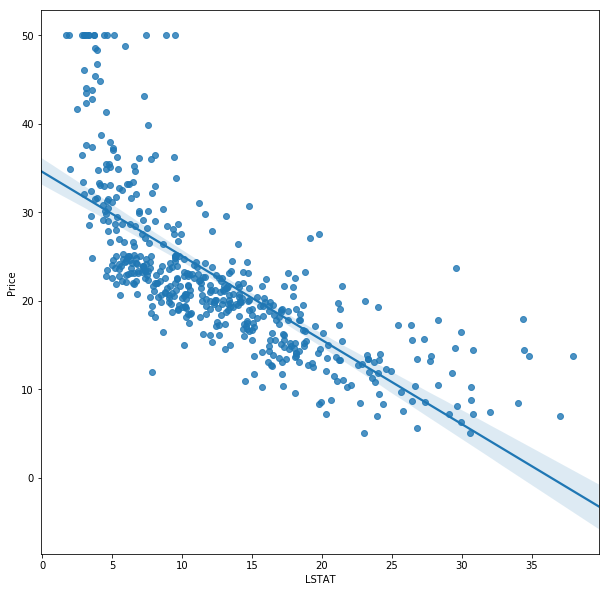

In [86]:
plt.figure(figsize=(10,10))
sns.regplot(X1,y1)
plt.xlabel('LSTAT')
plt.ylabel('Price')

## RANSAC ALGORITHM


### RANSAC / RANDOM SAMPLE ALGORITHM 
#### RANSAC is an iterative algorithm for the robust estimation of parameters from a subset of inliers from the complete data set.The algorithm splits the complete input sample data into a set of inliers, which may be subject to noise, and outliers, which are e.g. caused by erroneous measurements or invalid hypotheses about the data. The resulting model is then estimated only from the determined inliers

Each iteration performs the following steps:

1. Select min_samples random samples from the original data and check whether the set of data is valid (see is_data_valid).
2. Fit a model to the random subset (base_estimator.fit) and check whether the estimated model is valid (see is_model_valid).
3. Classify all data as inliers or outliers by calculating the residuals to the estimated model (base_estimator.predict(X) - y) - all data samples with absolute residuals smaller than the residual_threshold are considered as inliers.
4. Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number of inliers, it is only considered as the best model if it has better score.

In [111]:
X = df['RM'].values.reshape(-1,1)
y = df['price'].values

In [112]:
from sklearn.linear_model import RANSACRegressor

In [113]:
ransac = RANSACRegressor()

In [114]:
ransac.fit(X,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [106]:
inlier_mas= ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mas)

In [107]:
line_x = np.arange(3,10,1)
line_y = ransac.predict(line_x.reshape(-1,1))

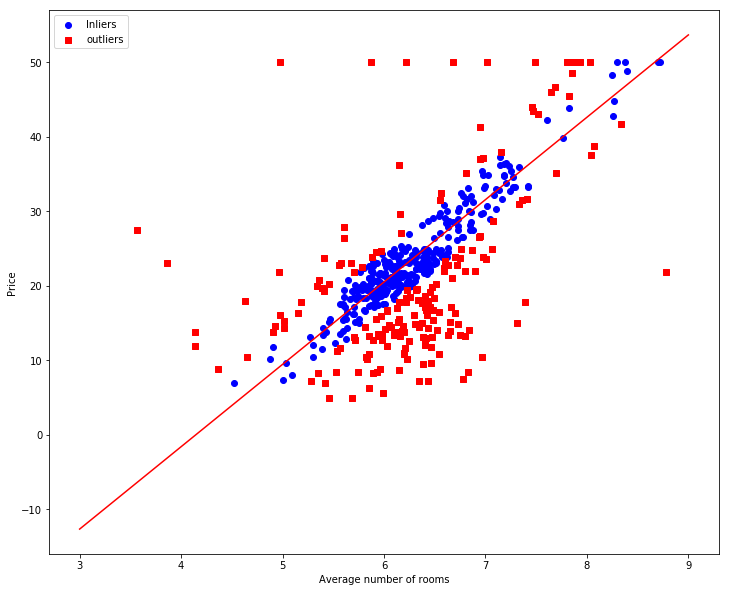

In [108]:
plt.figure(figsize=(12,10))
plt.scatter(X[inlier_mas],y[inlier_mas],c ='blue',marker='o',label='Inliers')
plt.scatter(X[outlier_mask],y[outlier_mask],c='red',marker='s',label='outliers')
plt.plot(line_x,line_y,color = 'red')
plt.xlabel('Average number of rooms')
plt.ylabel('Price')
plt.legend(loc='upper left')

In [109]:
ransac.estimator_.coef_

array([11.04945281])

In [110]:
ransac.estimator_.intercept_

-45.7853620101361

## EVALUATION OF REGRESSION MODEL PERFORMANCE

In [116]:
from sklearn.model_selection import train_test_split
X = df['LSTAT'].values.reshape(-1,1)
y=df['price'].values


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [118]:
lm = LinearRegression()

In [119]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

#### RESIDUAL ANALYSIS METHOD

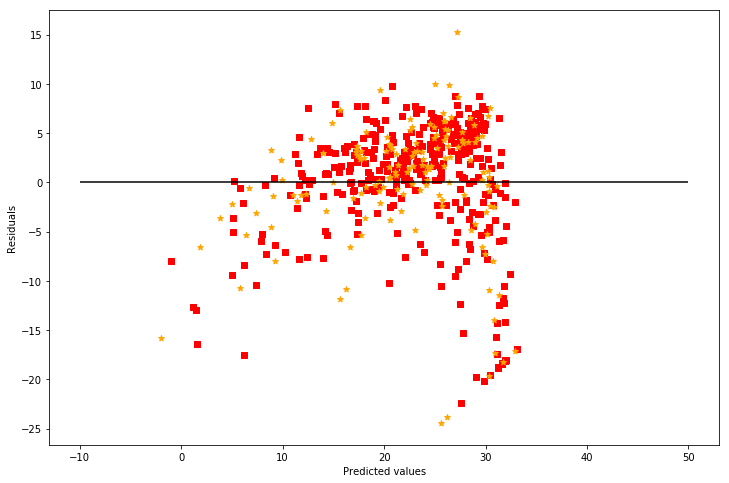

In [130]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred,y_train_pred-y_train,c='red',marker = 's',label='Training Data')
plt.scatter(y_test_pred,y_test_pred-y_test,c='orange',marker = '*',label = 'Testing Data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.hlines(y=0,xmin = -10,xmax=50,color = 'k')

#### MEAN SQUARE ERROR

In [132]:
from sklearn.metrics import mean_squared_error

In [133]:
mean_squared_error(y_train,y_train_pred)

37.933978172880295

In [134]:
mean_squared_error(y_test,y_test_pred)

39.81715050474416

#### COEFFICIENT OF DETERMINATION, R2. R2 = 1 - SSE/SST 
[sse = sum of squared errors,sst = total sum of square errors]
Higher the R2 score better the model explains about data

In [135]:
from sklearn.metrics import r2_score

In [136]:
r2_score(y_train,y_train_pred)

0.5524780757890007

In [137]:
r2_score(y_test,y_test_pred)

0.5218049526125568

# MULTIPLE LINEAR REGRESSION

## USING STATSMODEL LIBRARY

In [143]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [227]:
df = pd.DataFrame(bost['data'],columns=bost['feature_names'])
X=df
y=bost['target']

In [148]:
# we need to add constant to allow statsmodel.api too calculate bias and intercept
X_constant = sm.add_constant(X)
pd.DataFrame(X_constant)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.00,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98
1,1.00,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14
2,1.00,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03
3,1.00,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94
4,1.00,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33
5,1.00,0.03,0.00,2.18,0.00,0.46,6.43,58.70,6.06,3.00,222.00,18.70,394.12,5.21
6,1.00,0.09,12.50,7.87,0.00,0.52,6.01,66.60,5.56,5.00,311.00,15.20,395.60,12.43
7,1.00,0.14,12.50,7.87,0.00,0.52,6.17,96.10,5.95,5.00,311.00,15.20,396.90,19.15
8,1.00,0.21,12.50,7.87,0.00,0.52,5.63,100.00,6.08,5.00,311.00,15.20,386.63,29.93
9,1.00,0.17,12.50,7.87,0.00,0.52,6.00,85.90,6.59,5.00,311.00,15.20,386.71,17.10


In [144]:
sm.OLS?

In [149]:
model = sm.OLS(y,X_constant)

In [150]:
lr = model.fit()

In [152]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 04 Sep 2018   Prob (F-statistic):          6.95e-135
Time:                        14:27:16   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### CORRELATION AND FEATURE SELECTION

In [153]:
pd.options.display.float_format = '{:,.4f}'.format

In [154]:
corr_matrix = df.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0000,-0.1995,0.4045,-0.0553,0.4175,-0.2199,0.3508,-0.3779,0.6220,0.5796,0.2883,-0.3774,0.4522
ZN,-0.1995,1.0000,-0.5338,-0.0427,-0.5166,0.3120,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,0.1755,-0.4130
INDUS,0.4045,-0.5338,1.0000,0.0629,0.7637,-0.3917,0.6448,-0.7080,0.5951,0.7208,0.3832,-0.3570,0.6038
CHAS,-0.0553,-0.0427,0.0629,1.0000,0.0912,0.0913,0.0865,-0.0992,-0.0074,-0.0356,-0.1215,0.0488,-0.0539
NOX,0.4175,-0.5166,0.7637,0.0912,1.0000,-0.3022,0.7315,-0.7692,0.6114,0.6680,0.1889,-0.3801,0.5909
RM,-0.2199,0.3120,-0.3917,0.0913,-0.3022,1.0000,-0.2403,0.2052,-0.2098,-0.2920,-0.3555,0.1281,-0.6138
AGE,0.3508,-0.5695,0.6448,0.0865,0.7315,-0.2403,1.0000,-0.7479,0.4560,0.5065,0.2615,-0.2735,0.6023
DIS,-0.3779,0.6644,-0.7080,-0.0992,-0.7692,0.2052,-0.7479,1.0000,-0.4946,-0.5344,-0.2325,0.2915,-0.4970
RAD,0.6220,-0.3119,0.5951,-0.0074,0.6114,-0.2098,0.4560,-0.4946,1.0000,0.9102,0.4647,-0.4444,0.4887
TAX,0.5796,-0.3146,0.7208,-0.0356,0.6680,-0.2920,0.5065,-0.5344,0.9102,1.0000,0.4609,-0.4418,0.5440


In [155]:
corr_matrix[np.abs(corr_matrix)<0.6]=0
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6220,0.0000,0.0000,0.0000,0.0000
ZN,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6644,0.0000,0.0000,0.0000,0.0000,0.0000
INDUS,0.0000,0.0000,1.0000,0.0000,0.7637,0.0000,0.6448,-0.7080,0.0000,0.7208,0.0000,0.0000,0.6038
CHAS,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
NOX,0.0000,0.0000,0.7637,0.0000,1.0000,0.0000,0.7315,-0.7692,0.6114,0.6680,0.0000,0.0000,0.0000
RM,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.6138
AGE,0.0000,0.0000,0.6448,0.0000,0.7315,0.0000,1.0000,-0.7479,0.0000,0.0000,0.0000,0.0000,0.6023
DIS,0.0000,0.6644,-0.7080,0.0000,-0.7692,0.0000,-0.7479,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
RAD,0.6220,0.0000,0.0000,0.0000,0.6114,0.0000,0.0000,0.0000,1.0000,0.9102,0.0000,0.0000,0.0000
TAX,0.0000,0.0000,0.7208,0.0000,0.6680,0.0000,0.0000,0.0000,0.9102,1.0000,0.0000,0.0000,0.0000


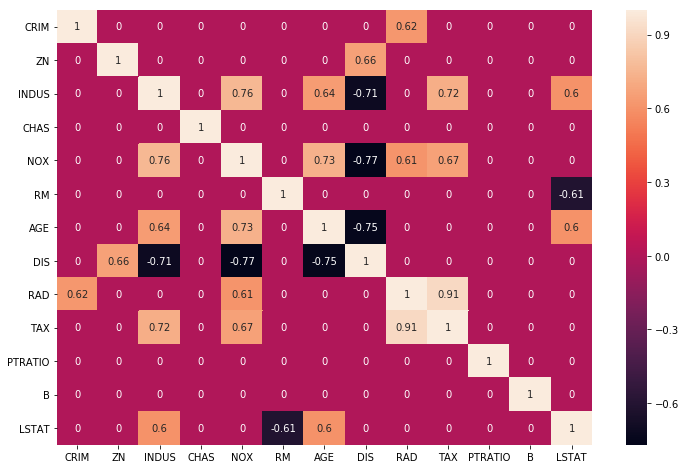

In [157]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)

#### DETECTING COLLINEARITY WITH EIGENVETORS

In [158]:
eigenvalues, eigenvectors = np.linalg.eig(df.corr())

In [159]:
# SMALl VALUES represents presence of collinearity in specific index
pd.Series(eigenvalues).sort_values()

8    0.0635
10   0.1692
11   0.1862
12   0.2203
9    0.2774
7    0.3965
6    0.5390
5    0.6597
4    0.8346
3    0.8578
2    1.2412
1    1.4321
0    6.1227
dtype: float64

In [161]:
np.abs(pd.Series(eigenvectors[:,8]).sort_values(ascending = False))

8    0.6334
2    0.2513
1    0.0809
6    0.0387
7    0.0183
11   0.0049
10   0.0235
12   0.0248
3    0.0359
4    0.0439
0    0.0455
5    0.0458
9    0.7202
dtype: float64

In [163]:
print(df.columns[2],df.columns[8],df.columns[9])

INDUS RAD TAX


#### FEATURE IMPORTANCE

##### 1st method
Check: 
1. Direction of coefficient
2. impact of variable/factor on the model

In [165]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [166]:
result = pd.DataFrame(list(zip(model.coef_,df.columns)),columns=['coefficient','name']).set_index('name')
np.abs(result).sort_values(by='coefficient',ascending = False)

,coefficient
name,
NOX,17.7958
RM,3.8048
CHAS,2.6886
DIS,1.4758
PTRATIO,0.9535
LSTAT,0.5255
RAD,0.3057
CRIM,0.1072
ZN,0.0464


In [164]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [167]:
scaler = StandardScaler()
standard_coefficient_linear_reg = make_pipeline(scaler,model)


In [168]:
standard_coefficient_linear_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [169]:
result = pd.DataFrame(list(zip(standard_coefficient_linear_reg.steps[1][1].coef_,df.columns)),
                     columns=['coefficient','name']).set_index('name')
np.abs(result).sort_values(by='coefficient',ascending = False)

,coefficient
name,
LSTAT,3.7487
DIS,3.1044
RM,2.6706
RAD,2.6588
TAX,2.0759
PTRATIO,2.0622
NOX,2.0601
ZN,1.0810
CRIM,0.9204


##### 2nd method
use R2 to identify key features

-> compare R2 of model against R2 of model without feature.

-> A significant change in R2 signify the importance of the feature

In [171]:
from sklearn.metrics import r2_score
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [175]:
linear_reg = smf.ols(formula='y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B+ LSTAT',
                    data=df)
benchmark = linear_reg.fit()
r2_score(y,benchmark.predict(df))

0.7406077428649428

without LSTAT

In [176]:
linear_reg = smf.ols(formula='y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B',
                    data=df)
lr_without_LSTAT = linear_reg.fit()
r2_score(y,lr_without_LSTAT.predict(df))

0.6839521119105447

without AGE

In [178]:
linear_reg = smf.ols(formula='y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B+ LSTAT',
                    data=df)
lr_without_AGE = linear_reg.fit()
r2_score(y,lr_without_AGE.predict(df))

# since we had r2 didnt dropped when we run model without AGE,and R2 dropped significantly when we drop LSTAT so this is the way we get to know variable importance

0.7406060387904339

## GRADIENT DESCENT

In [182]:
X=df[['LSTAT']].values
y=bost.target

In [184]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1)).flatten()

In [190]:
alpha = 0.0001
w_ = np.zeros(1+X_std.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X_std,w_[1:])+w_[0]
    errors =(y_std - y_pred)
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors**2).sum() /2.0
    cost_.append(cost)

Text(0,0.5,'SSE')

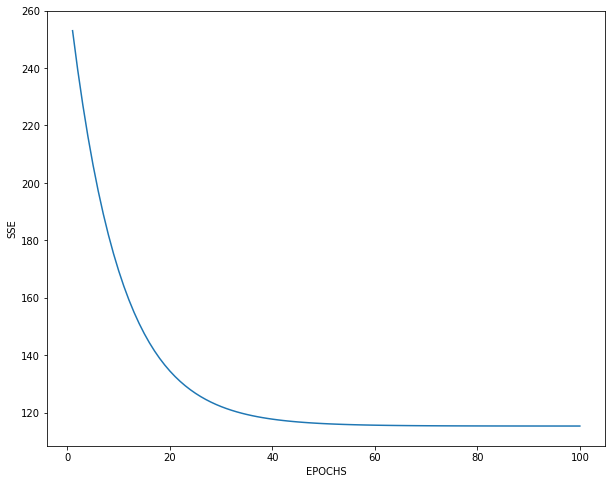

In [193]:
plt.figure(figsize=(10,8))
plt.plot(range(1,n_+1),cost_)
plt.xlabel('EPOCHS')
plt.ylabel('SSE')

In [195]:
# Coefficients (b0[intercept],b1[slope])
w_

array([-7.57793828e-16, -7.33562757e-01])

## Regularised method for Regression

#####  Regularization
This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.

### examples
1. Ridge Regression
2. Least Absolute Shrinkage and Selection Operator(LASSO)
3. Elastic Net

In ols the main issue is due to outliers line of best fit gets affected.
Ridge Regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients.The ridge coefficients minimize a penalized residual sum of squares.

min||Xw - y||^2 + a|| w ||^2

(pred-act)2 + (sum of weights squared)


$$\min_{w}\big|\big|Xw-y\big|\big|^2_2+\alpha\big|\big|w\big|\big|^2_2$$

$\alpha>=0$ is a complexity parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

Ridge regression is an L2 penalized model. Add the squared sum of the weights to the least-squares cost function.



## LASSO Regression

A linear model that estimates sparse coefficients.

Mathematically, it consists of a linear model trained with $\ell_1$ prior as regularizer. The objective function to minimize is:

$$\min_{w}\frac{1}{2n_{samples}} \big|\big|Xw - y\big|\big|_2^2 + \alpha \big|\big|w\big|\big|_1$$

The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha \big|\big|w\big|\big|_1$ added, where $\alpha$ is a constant and $\big|\big|w\big|\big|_1$ is the $\ell_1-norm$ of the parameter vector.

## Elastic Net

A linear regression model trained with L1 and L2 prior as regularizer. 

This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 

Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

The objective function to minimize is in this case

$$\min_{w}{\frac{1}{2n_{samples}} \big|\big|X w - y\big|\big|_2 ^ 2 + \alpha \rho \big|\big|w\big|\big|_1 +
\frac{\alpha(1-\rho)}{2} \big|\big|w\big|\big|_2 ^ 2}$$





#### OUTLIERS IMPACT

Coefficient Estimates:  [0.47134857]


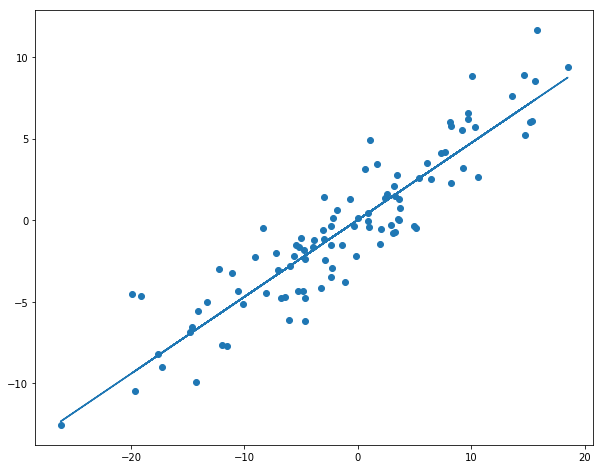

In [213]:
np.random.seed(42)
n_samples = 100
rng = np.random.randn(n_samples)*10
y_gen = 0.5 * rng +2*np.random.randn(n_samples)


lr = LinearRegression()

lr.fit(rng.reshape(-1,1),y_gen)
model_predict = lr.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8))
plt.scatter(rng,y_gen)
plt.plot(rng,model_predict)
print('Coefficient Estimates: ',lr.coef_)

In [214]:
idx = rng.argmax()
y_gen[idx]=200

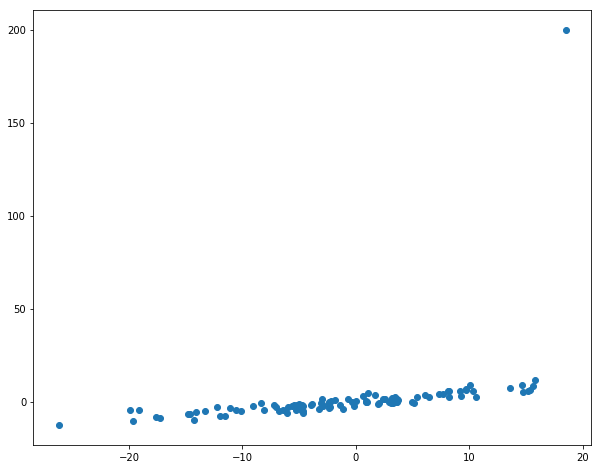

In [215]:
plt.figure(figsize=(10,8))
plt.scatter(rng,y_gen)

Coefficient Estimate:  [0.92796845]


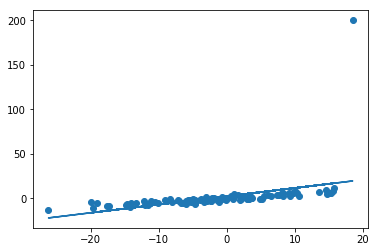

In [216]:
o_lr = LinearRegression()
o_lr.fit(rng.reshape(-1,1),y_gen)
o_model_pred = o_lr.predict(rng.reshape(-1,1))

plt.scatter(rng,y_gen)
plt.plot(rng,o_model_pred)
print("Coefficient Estimate: ",o_lr.coef_)

#### RIDGE REGRESSION

In [217]:
from sklearn.linear_model import Ridge

Coefficient Estimate:  [0.46398423]


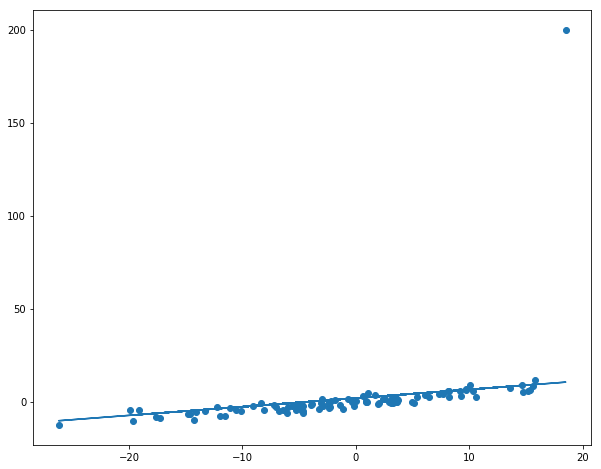

In [220]:
ridge_mod = Ridge(alpha=1,normalize=True)
ridge_mod.fit(rng.reshape(-1,1),y_gen)

ridge_mod_pred = ridge_mod.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8))
plt.scatter(rng,y_gen)
plt.plot(rng,ridge_mod_pred)
print('Coefficient Estimate: ', ridge_mod.coef_)

#### LASSO REGRESSION

In [223]:
from sklearn.linear_model import Lasso

Coefficient Estimate:  [0.48530263]


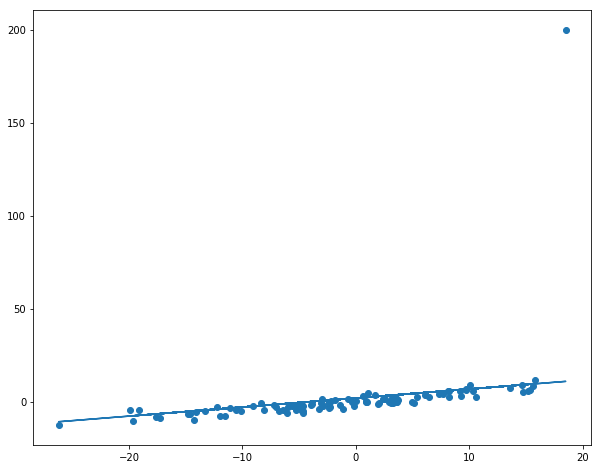

In [224]:
lasso_mod = Lasso(alpha=0.4,normalize=True)
lasso_mod.fit(rng.reshape(-1,1),y_gen)
lasso_mod_pred = lasso_mod.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8))
plt.scatter(rng,y_gen)
plt.plot(rng,lasso_mod_pred)
print('Coefficient Estimate: ', lasso_mod.coef_)

#### ELASTIC NET REGRESSION

In [225]:
from sklearn.linear_model import ElasticNet

Coefficient Estimate:  [0.4584509]


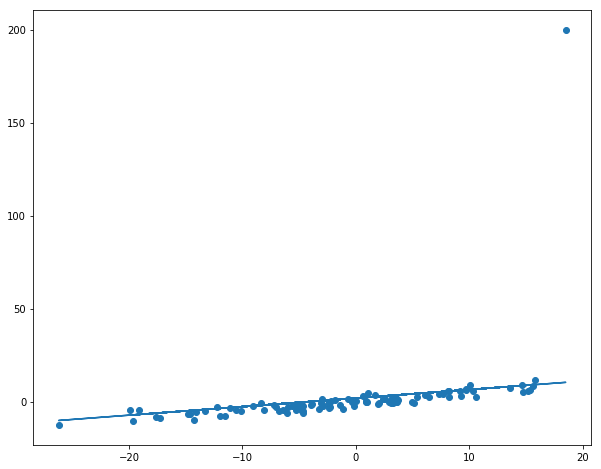

In [226]:
en_mod = ElasticNet(alpha=0.02,normalize=True)
en_mod.fit(rng.reshape(-1,1),y_gen)
en_mod_pred = en_mod.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8))
plt.scatter(rng,y_gen)
plt.plot(rng,en_mod_pred)
print('Coefficient Estimate: ', en_mod.coef_)

## NONLINEAR RELATIONS

#### DECISION TREE REGRESSOR

In [229]:
from sklearn.tree import DecisionTreeRegressor

In [230]:
X = df[['LSTAT']].values

In [236]:
tree = DecisionTreeRegressor(max_depth=5)


In [237]:
tree.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [238]:
sort_idx = X.flatten().argsort()

Text(0,0.5,'PRICE')

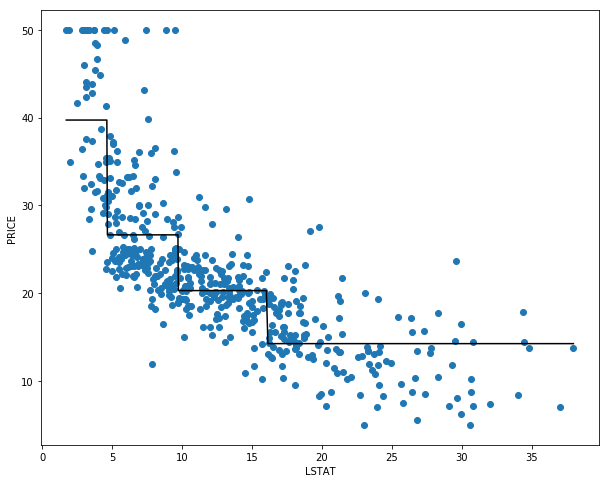

In [239]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx],y[sort_idx])
plt.plot(X[sort_idx],tree.predict(X[sort_idx]),color='k')

plt.xlabel("LSTAT")
plt.ylabel('PRICE')

# using max_depth= 5 leads to overfitting

Text(0,0.5,'PRICE')

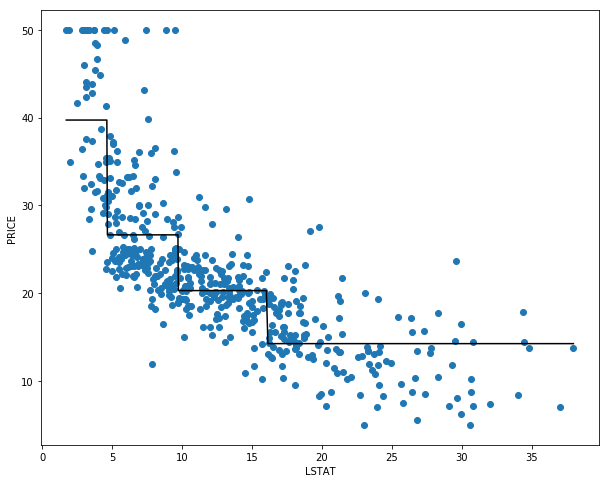

In [241]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X,y)
sort_idx = X.flatten().argsort()
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx],y[sort_idx])
plt.plot(X[sort_idx],tree.predict(X[sort_idx]),color='k')

plt.xlabel("LSTAT")
plt.ylabel('PRICE')


## ENSEMBLE METHOD
#### RANDOM FOREST (ENSEMBLE)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [36]:
X=df.values
y = bost.target

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
forest = RandomForestRegressor(n_estimators=500,criterion='mse',
                              random_state = 42, n_jobs = -1)

In [40]:
forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [41]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [253]:
print("MSE train : {0:.4f},test: {1:.4f}".\
     format(mean_squared_error(y_train,y_train_pred),
           mean_squared_error(y_test,y_test_pred)))

MSE train : 1.8712,test: 9.3994


In [254]:
print("R2 train : {0:.4f},test: {1:.4f}".\
     format(r2_score(y_train,y_train_pred),
           r2_score(y_test,y_test_pred)))

MSE train : 0.9787,test: 0.8739


#### ADABOOST (ENSEMBLE)

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [14]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 4),
                       n_estimators=500,random_state = 42)

In [22]:
ada.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=500,
         random_state=42)

In [23]:
y_train_pred = ada.predict(X_train)

In [24]:
y_test_pred = ada.predict(X_test)

In [25]:
print("MSE train : {0:.4f},test: {1:.4f}".\
     format(mean_squared_error(y_train,y_train_pred),
           mean_squared_error(y_test,y_test_pred)))

MSE train : 4.4864,test: 13.2099


In [28]:
print("R2 train : {0:.4f},test: {1:.4f}".\
     format(r2_score(y_train,y_train_pred),
           r2_score(y_test,y_test_pred)))

R2 train : 0.9490,test: 0.8227


#### REVISITED FEATURE IMPORTANCE
#### ACCORDING TO AdaBoost

In [29]:
ada.feature_importances_

array([0.03380489, 0.00342185, 0.00904711, 0.00108256, 0.04181682,
       0.24254942, 0.00874274, 0.12358089, 0.01733797, 0.02265699,
       0.0392171 , 0.02421406, 0.43252762])

In [30]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [32]:
result = pd.DataFrame(ada.feature_importances_,df.columns)
result.columns = ['features']

In [33]:
result.sort_values(by='features',ascending=False)

,features
LSTAT,0.432528
RM,0.242549
DIS,0.123581
NOX,0.041817
PTRATIO,0.039217
CRIM,0.033805
B,0.024214
TAX,0.022657
RAD,0.017338
INDUS,0.009047


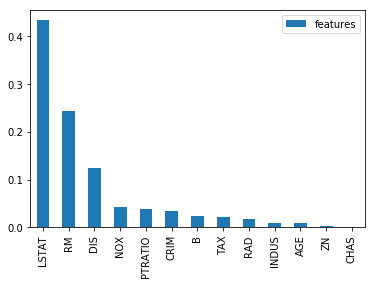

In [34]:
result.sort_values(by='features',ascending=False).plot(kind='bar')

#### ACCORDING TO RANDOM FOREST

In [42]:
forest.feature_importances_

array([0.03036163, 0.001677  , 0.0068441 , 0.0012651 , 0.01535587,
       0.40401012, 0.01400592, 0.06316796, 0.00461262, 0.01215806,
       0.0186434 , 0.01276181, 0.41513641])

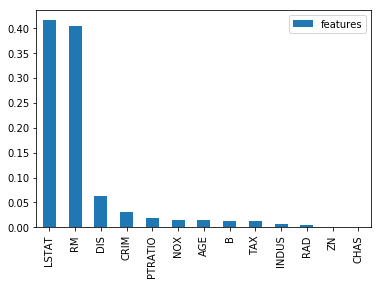

In [44]:
result = pd.DataFrame(forest.feature_importances_,df.columns)
result.columns = ['features']
result.sort_values(by='features',ascending=False).plot(kind='bar')

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
tree = DecisionTreeRegressor(max_depth=4)

In [47]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [50]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [51]:
print("mse train {}, test{}".\
      format(mean_squared_error(y_train,y_train_pred),
            mean_squared_error(y_test,y_test_pred)))

mse train 8.65160914414246, test20.48138926901579


In [55]:
print("R^2 train {}, test{}".\
      format(r2_score(y_train,y_train_pred),
            r2_score(y_test,y_test_pred)))

R^2 train 0.9015705261418473, test0.7251303396681299


In [52]:
tree.feature_importances_

array([0.04129615, 0.        , 0.        , 0.        , 0.        ,
       0.6271245 , 0.        , 0.11309668, 0.        , 0.        ,
       0.        , 0.00744201, 0.21104066])

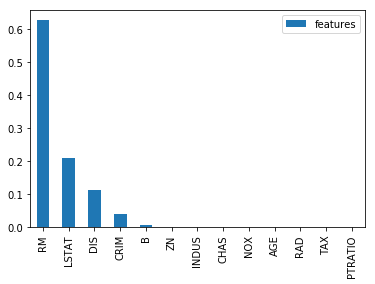

In [54]:
featimp_result = pd.DataFrame(tree.feature_importances_,df.columns)
featimp_result.columns=['features']
featimp_result.sort_values(by='features',ascending= False).plot(kind='bar')

## DATA PRE PROCESSING
#### FOR CONTINUOS FEATURES

* Standardization / Mean Removal

* Min-Max or Scaling Features to a Range

* Normalization

* Binarization

Assumptions:

* Implicit/explicit assumption of machine learning algorithms: The features follow a normal distribution.
* Most method are based on linear assumptions
* Most machine learning requires the data to be standard normally distributed. Gaussian with zero mean and unit variance.

[scikit-learn:](http://scikit-learn.org/stable/modules/preprocessing.html) In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) **assume that all features are centered around zero and have variance in the same order**. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.



## Standardization / Mean Removal / Variance Scaling

[scikit Scale](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)
Mean is removed. Data is centered on zero. This is to remove bias.

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance. "standard normal" random variable with mean 0 and standard deviation 1.

$$X'=\frac{X-\bar{X}}{\sigma}$$

## Min-Max or Scaling Features to a Range

Scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size.

The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.
doc:

Init signature: preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)

Transforms features by scaling each feature to a given range.

This estimator scales and translates each feature individually such
that it is in the given range on the training set, i.e. between
zero and one.

The transformation is given by::

    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min
    
$$X_{std}=\frac{X-X_{min}}{X_{max}-X_{min}}$$

$$X'=X_{std} (\text{max} - \text{min}) + \text{min}$$

## MaxAbsScaler

Works in a very similar fashion, but scales in a way that the training data lies within the range `[-1, 1]` by dividing through the largest maximum value in each feature. It is meant for data that is already centered at zero or sparse data.

## Normalization
Normalization is the process of scaling individual samples to have unit norm. 

This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

$$X'=\frac{X-X_{mean}}{X_{max}-X_{min}}$$

This assumption is the base of the Vector Space Model often used in text classification and clustering contexts.

There are two types of Normalization

  1. **L1 normalization**, Least Absolute Deviations
Ensure the sum of absolute values is 1 in each row. 

  2. **L2 normalization**, Least squares, 
Ensure that the sum of squares is 1.

## Binarization

$$f(x)={0,1}$$

Feature binarization is the process of thresholding numerical features to get boolean values. This can be useful for downstream probabilistic estimators that make assumption that the input data is distributed according to a multi-variate Bernoulli distribution


It is also common among the text processing community to use binary feature values (probably to simplify the probabilistic reasoning) even if normalized counts (a.k.a. term frequencies) or TF-IDF valued features often perform slightly better in practice.

#### FOR CATEGORICAL DATA

* [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
* One Hot / One-of-K Encoding

Useful for dealing with sparse matrix
uses [one-of-k scheme](http://code-factor.blogspot.sg/2012/10/one-hotone-of-k-data-encoder-for.html)


The process of turning a series of categorical responses into a set of binary result (0 or 1)